In [58]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv("../src/MAE.csv", index_col="condition")
df = df[df['processor'] == "QSCOUT"]

order = [
    "Manually compiled",
    "Superstaq",
    "Mirror SWAPs",
    "RC",
]

postselected_order_selector = [o + ' (postselected)' for o in order]
non_postselected_order_selector = [o + ' (non-postselected)' for o in order]

em1_postselected = df[df['emitter'] == "Emitter 1"].loc[postselected_order_selector]
em2_postselected = df[df['emitter'] == "Emitter 2"].loc[postselected_order_selector]
em1_postselected['condition'] = order
em2_postselected['condition'] = order

em1_non_postselected = df[df['emitter'] == "Emitter 1"].loc[non_postselected_order_selector]
em2_non_postselected = df[df['emitter'] == "Emitter 2"].loc[non_postselected_order_selector]
em1_non_postselected['condition'] = order
em2_non_postselected['condition'] = order

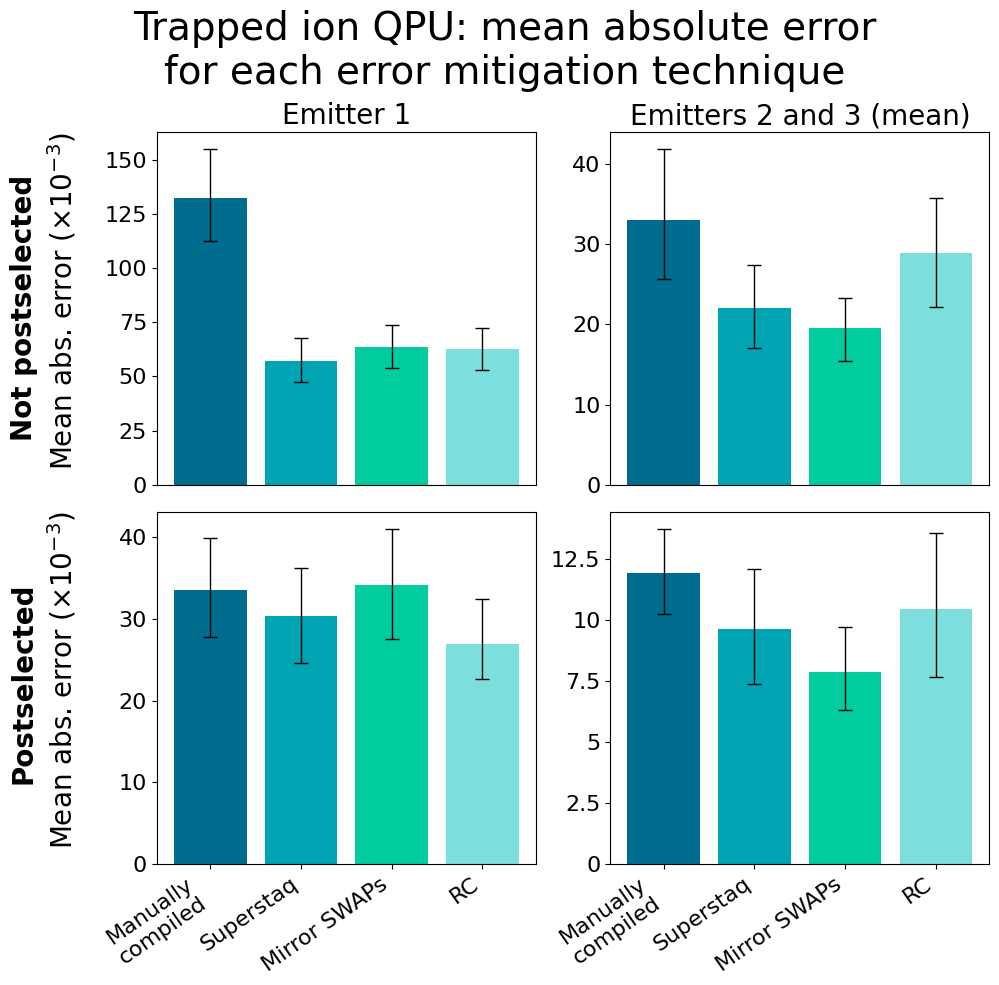

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

colors = [
    "#006d8f", # (darker teal blue)
    "#00a5b3", # (medium turquoise)
    "#00cc9f", # (bright seafoam)
    "#7cdfdd", # (light aqua)
]



axes[0,0].bar(np.arange(len(em1_non_postselected)), em1_non_postselected["MAE"], 
        yerr=np.vstack([em1_non_postselected["lower_err"], em1_non_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[0,0].set_xticks([])
# axes[0,0].set_xticks(np.arange(len(em1_non_postselected)))
# axes[0,0].set_xticklabels(["Manually\ncompiled"] + em1_non_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[0,0].tick_params(axis='y', labelsize=16)
axes[0,0].set_title("Emitter 1", fontsize=20)
# axes[0,0].set_ylabel("Mean abs. error ($\\times 10^{-3}$)", fontsize=20)

axes[0,1].bar(np.arange(len(em2_non_postselected)), em2_non_postselected["MAE"], 
        yerr=np.vstack([em2_non_postselected["lower_err"], em2_non_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[0,1].set_xticks([])
# axes[0,1].set_xticks(np.arange(len(em2_non_postselected)))
# axes[0,1].set_xticklabels(["Manually\ncompiled"] + em2_non_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[0,1].tick_params(axis='y', labelsize=16)
axes[0,1].set_title("Emitters 2 and 3 (mean)", fontsize=20)

import matplotlib as mpl
scale_factor = 10**-3
fmt = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_factor))
axes[0,0].yaxis.set_major_formatter(fmt)
axes[0,1].yaxis.set_major_formatter(fmt)


#############################################


axes[1,0].bar(np.arange(len(em1_postselected)), em1_postselected["MAE"], 
        yerr=np.vstack([em1_postselected["lower_err"], em1_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[1,0].set_xticks(np.arange(len(em1_postselected)))
axes[1,0].set_xticklabels(["Manually\ncompiled"] + em1_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[1,0].tick_params(axis='y', labelsize=16)
# axes[1,0].set_title("Emitter 1", fontsize=20)
# axes[1,0].set_ylabel("Mean abs. error ($\\times 10^{-3}$)", fontsize=20)

axes[1,1].bar(np.arange(len(em2_postselected)), em2_postselected["MAE"], 
        yerr=np.vstack([em2_postselected["lower_err"], em2_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[1,1].set_xticks(np.arange(len(em2_postselected)))
axes[1,1].set_xticklabels(["Manually\ncompiled"] + em2_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[1,1].tick_params(axis='y', labelsize=16)
# axes[1,1].set_title("Emitter 2 and 3", fontsize=20)

import matplotlib as mpl
scale_factor = 10**-3
fmt = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_factor))
axes[1,0].yaxis.set_major_formatter(fmt)
axes[1,1].yaxis.set_major_formatter(fmt)

#############################################


axes[0,0].text(-0.25, 1, "Mean abs. error ($\\times 10^{-3}$)", transform=axes[0,0].transAxes,
        ha='center', va='top', fontsize=20, rotation=90)
axes[1,0].text(-0.25, 1, "Mean abs. error ($\\times 10^{-3}$)", transform=axes[1,0].transAxes,
        ha='center', va='top', fontsize=20, rotation=90)

axes[0,0].text(-0.35, 0.88, "Not postselected", transform=axes[0,0].transAxes, weight='bold',
        ha='center', va='top', fontsize=20, rotation=90)

axes[1,0].text(-0.35, 0.8, "Postselected", transform=axes[1,0].transAxes, weight='bold',
        ha='center', va='top', fontsize=20, rotation=90)


fig.suptitle("Trapped ion QPU: mean absolute error\nfor each error mitigation technique", fontsize=28)
plt.tight_layout()

In [ ]:
fig.savefig("../figures/QSCOUT_MAE.eps")

# old version of the plot with only postselected data

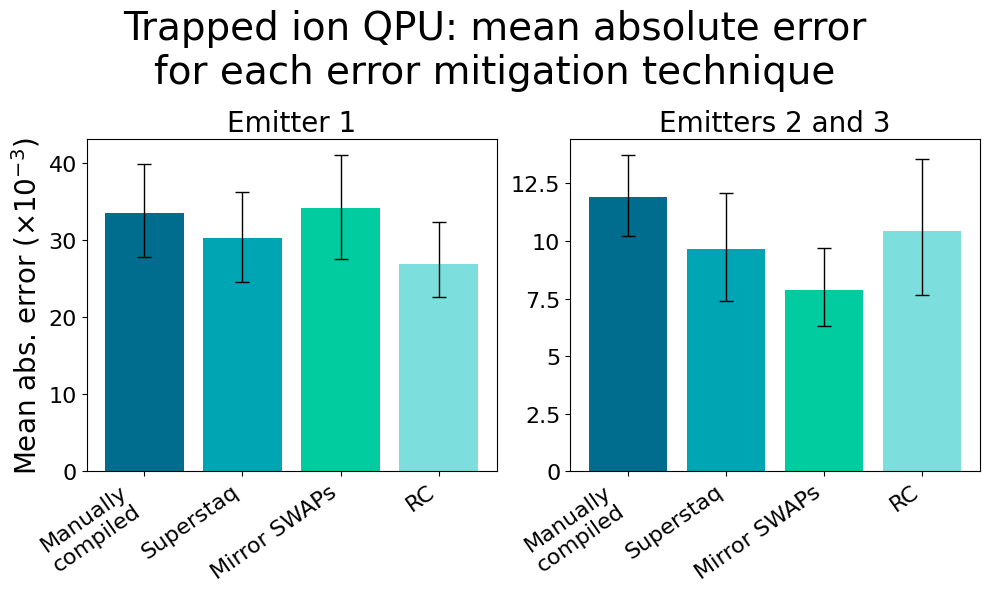

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

colors = [
    "#006d8f", # (darker teal blue)
    "#00a5b3", # (medium turquoise)
    "#00cc9f", # (bright seafoam)
    "#7cdfdd", # (light aqua)
]



axes[0].bar(np.arange(len(em1_postselected)), em1_postselected["MAE"], 
        yerr=np.vstack([em1_postselected["lower_err"], em1_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[0].set_xticks([])
axes[0].set_xticks(np.arange(len(em1_postselected)))
axes[0].set_xticklabels(["Manually\ncompiled"] + em1_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_title("Emitter 1", fontsize=20)
axes[0].set_ylabel("Mean abs. error ($\\times 10^{-3}$)", fontsize=20)

axes[1].bar(np.arange(len(em2_postselected)), em2_postselected["MAE"], 
        yerr=np.vstack([em2_postselected["lower_err"], em2_postselected["upper_err"]]),
        capsize=5,
        ecolor='black',      # color of error bars
        color=colors,
        error_kw={
            'capthick': 1,   # thickness of cap lines
            'elinewidth': 1  # thickness of error bars
        })
axes[1].set_xticks([])
axes[1].set_xticks(np.arange(len(em2_postselected)))
axes[1].set_xticklabels(["Manually\ncompiled"] + em2_postselected["condition"][1:].tolist(), rotation=35, ha='right', fontsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_title("Emitters 2 and 3", fontsize=20)

import matplotlib as mpl
scale_factor = 10**-3
fmt = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_factor))
axes[0].yaxis.set_major_formatter(fmt)
axes[1].yaxis.set_major_formatter(fmt)


fig.suptitle("Trapped ion QPU: mean absolute error\nfor each error mitigation technique", fontsize=28)
plt.tight_layout()